Here we want to change the values of rainfall to a more realistic measure (within 1mm), play with both the threshold for the rainfall events as well as testing multiple thresholds. Also we want to change several existing variables: month, for instance, should be one-hot encoded instead of label encoded. Time should likely also get some kind of change-- hour could maybe be categorized (morning, day, night or something) and one-hotted as well. <-- pandas get_dummies 

We can also test for differences in means for different thresholds


Other ideas?

# Imports and fixes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling as pdp

In [2]:
data = pd.read_csv('data.csv')
data['sss_change'] = data['sss'].diff().fillna(0)
data.head()

,new_time,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,...,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,set,sst_pct_change,dir_pct_change,spd_pct_change,sss_change
0,2012-09-14 20:30:00.000028800,735126.854167,37.768217,27.886503,3.171527,-70.402566,0.0,0.0,0.0,2012,...,-0.223661,-1.120622,2.145583,0.000000,0.000000,Spurs1,0.000000,0.000000,0.000000,0.000000
1,2012-09-14 21:29:59.999971200,735126.895833,37.767291,27.794171,3.511590,-78.652231,0.0,0.0,0.0,2012,...,-0.285520,-0.968037,2.081695,-0.000025,-0.031722,Spurs1,-1.374910,0.135314,0.293850,-0.000926
2,2012-09-14 22:30:00.000000000,735126.937500,37.767912,27.717789,4.870495,-86.660419,0.0,0.0,0.0,2012,...,-0.345568,-0.358302,2.028844,0.000016,0.022122,Spurs1,-1.141199,0.126846,1.265220,0.000621
3,2012-09-14 23:30:00.000028800,735126.979167,37.768554,27.650786,4.511677,-89.874044,0.0,0.0,0.0,2012,...,-0.369664,-0.519302,1.982482,0.000017,0.022846,Spurs1,-1.003867,0.091158,-0.334265,0.000642
4,2012-09-15 00:29:59.999971200,735127.020833,37.770119,27.593085,4.318494,-94.403915,0.0,0.0,0.0,2012,...,-0.403631,-0.605983,1.942557,0.000041,0.054988,Spurs1,-0.866609,0.098501,-0.227134,0.001566


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9133 entries, 0 to 9132
Data columns (total 24 columns):
new_time          9133 non-null object
time              9133 non-null float64
sss               9133 non-null float64
sst               9133 non-null float64
wind_spd          9133 non-null float64
wind_dir          9133 non-null float64
precip            9133 non-null float64
cum_precip3       9133 non-null float64
cum_precip6       9133 non-null float64
year              9133 non-null int64
month             9133 non-null int64
day               9133 non-null int64
hour              9133 non-null int64
scaled_sss        9133 non-null float64
scaled_dir        9133 non-null float64
scaled_spd        9133 non-null float64
scaled_sst        9133 non-null float64
pct_change        9133 non-null float64
pct_c_scaled      9133 non-null float64
set               9133 non-null object
sst_pct_change    9133 non-null float64
dir_pct_change    9133 non-null float64
spd_pct_change    9133 

In [4]:
data.drop(['scaled_sss','scaled_dir','scaled_spd','scaled_sst','set','spd_pct_change',
          'dir_pct_change','sst_pct_change','pct_change','pct_c_scaled'],axis=1,inplace=True)
data.head()

,new_time,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,day,hour,sss_change
0,2012-09-14 20:30:00.000028800,735126.854167,37.768217,27.886503,3.171527,-70.402566,0.0,0.0,0.0,2012,9,14,20,0.000000
1,2012-09-14 21:29:59.999971200,735126.895833,37.767291,27.794171,3.511590,-78.652231,0.0,0.0,0.0,2012,9,14,21,-0.000926
2,2012-09-14 22:30:00.000000000,735126.937500,37.767912,27.717789,4.870495,-86.660419,0.0,0.0,0.0,2012,9,14,22,0.000621
3,2012-09-14 23:30:00.000028800,735126.979167,37.768554,27.650786,4.511677,-89.874044,0.0,0.0,0.0,2012,9,14,23,0.000642
4,2012-09-15 00:29:59.999971200,735127.020833,37.770119,27.593085,4.318494,-94.403915,0.0,0.0,0.0,2012,9,15,0,0.001566


In [5]:
data['wind_change'] = data['wind_spd'].diff().fillna(0)
print(data[data['precip'] < 0.01].shape[0])
data.head()

8707


,new_time,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,day,hour,sss_change,wind_change
0,2012-09-14 20:30:00.000028800,735126.854167,37.768217,27.886503,3.171527,-70.402566,0.0,0.0,0.0,2012,9,14,20,0.000000,0.000000
1,2012-09-14 21:29:59.999971200,735126.895833,37.767291,27.794171,3.511590,-78.652231,0.0,0.0,0.0,2012,9,14,21,-0.000926,0.340064
2,2012-09-14 22:30:00.000000000,735126.937500,37.767912,27.717789,4.870495,-86.660419,0.0,0.0,0.0,2012,9,14,22,0.000621,1.358904
3,2012-09-14 23:30:00.000028800,735126.979167,37.768554,27.650786,4.511677,-89.874044,0.0,0.0,0.0,2012,9,14,23,0.000642,-0.358818
4,2012-09-15 00:29:59.999971200,735127.020833,37.770119,27.593085,4.318494,-94.403915,0.0,0.0,0.0,2012,9,15,0,0.001566,-0.193182


## Fixing Rainfall Measures

In [6]:
data.loc[(data['precip'] <= 0.01), 'precip'] = 0.0
data.loc[(data['precip'] <= 0.01)]['precip'].sum()

0.0

In [7]:
data.iloc[1419]

new_time       2012-11-12 23:30:00.000028800
time                                  735186
sss                                  37.6063
sst                                  25.3023
wind_spd                             9.91813
wind_dir                             175.172
precip                                     0
cum_precip3                         0.136801
cum_precip6                          4.89697
year                                    2012
month                                     11
day                                       12
hour                                      23
sss_change                      -0.000288769
wind_change                       -0.0626496
Name: 1419, dtype: object

In [8]:
#data.loc[((data.precip > 0) &  (data.precip < 0.1 )), 'precip'] = 0.1
data.precip = np.around(data.precip,1)
data.precip.sort_values(ascending=False)

2947    35.4
268     31.5
2935    23.4
274     21.8
2496    18.5
1013    18.2
277     17.5
8727    14.1
4303    13.9
1421    13.3
1422    12.8
300     12.4
3334    12.0
2948    11.6
3377    11.6
1657    11.4
8726     9.7
5619     8.8
3339     8.6
1975     8.6
8952     7.6
2959     7.5
3898     6.9
1974     6.6
1012     6.6
3335     6.2
8725     6.1
1571     6.0
270      6.0
3383     5.9
        ... 
6043     0.0
6042     0.0
6041     0.0
6040     0.0
6038     0.0
6064     0.0
6037     0.0
6036     0.0
6035     0.0
6034     0.0
6033     0.0
6032     0.0
6046     0.0
6047     0.0
6048     0.0
6049     0.0
6050     0.0
6052     0.0
6053     0.0
6054     0.0
6055     0.0
6056     0.0
6057     0.0
6058     0.0
6059     0.0
6060     0.0
6061     0.0
6062     0.0
6063     0.0
0        0.0
Name: precip, Length: 9133, dtype: float64

In [9]:
data[(data['precip'] < 0.1)]['precip'].sort_values(ascending=False)

9132    0.0
3130    0.0
3136    0.0
3135    0.0
3134    0.0
3133    0.0
3132    0.0
3131    0.0
3129    0.0
3085    0.0
3128    0.0
3127    0.0
3126    0.0
3125    0.0
3124    0.0
3123    0.0
3137    0.0
3139    0.0
3140    0.0
3141    0.0
3142    0.0
3143    0.0
3144    0.0
3145    0.0
3146    0.0
3149    0.0
3150    0.0
3151    0.0
3152    0.0
3153    0.0
       ... 
6137    0.0
6138    0.0
6139    0.0
6140    0.0
6141    0.0
6142    0.0
6143    0.0
6144    0.0
6145    0.0
6146    0.0
6147    0.0
6148    0.0
6149    0.0
6151    0.0
6166    0.0
6152    0.0
6153    0.0
6154    0.0
6155    0.0
6156    0.0
6157    0.0
6158    0.0
6159    0.0
6160    0.0
6161    0.0
6162    0.0
6163    0.0
6164    0.0
6165    0.0
0       0.0
Name: precip, Length: 8745, dtype: float64

# One hot encoding

In [10]:
new_data = data.copy()
new_data['season'] = new_data['month'].copy()
new_data.loc[((new_data.season <=2 ) |  (new_data.season > 11)), 'season'] = 'Winter'
new_data.loc[(new_data.season ==3), 'season'] = 'Spring'
new_data.loc[(new_data.season ==4), 'season'] = 'Spring'
new_data.loc[(new_data.season ==5), 'season'] = 'Spring'
new_data.loc[(new_data.season ==6), 'season'] = 'Summer'
new_data.loc[(new_data.season ==7), 'season'] = 'Summer'
new_data.loc[(new_data.season ==8), 'season'] = 'Summer'
new_data.loc[(new_data.season ==9), 'season'] = 'Fall'
new_data.loc[(new_data.season ==10), 'season'] = 'Fall'
new_data.loc[(new_data.season ==11), 'season'] = 'Fall'


new_data.loc[((new_data.hour >= 6) & (new_data.hour <18)), 'hour'] = 'Day'
new_data.loc[new_data.hour != 'Day', 'hour'] = 'Night'

#new_data.loc[((new_data.hour >=11) & (new_data.hour<=16)), 'hour'] = 'Night'
#new_data.loc[(new_data.hour ), 'season'] = 'Fall'

#new_data.loc[((new_data.season >= 6 ) &  (new_data.season <= 8)), 'season'] = 'Summer'
#new_data.loc[((new_data.season > 8 ) &  (new_data.season <= 11)), 'season'] = 'Fall'

# months = {'1': 'January', '2':'February', '3':'March','4':'April','5': 'May', '6':'June', '7':'July','8':'August',
#          '9': 'September', '10':'October', '11':'November','12':'December',}
# new_data['month'] = new_data['month'].replace(months)
# new_data['hour'].replace(12,'Day', inplace=True)
# new_data['hour'].replace(13,'Day', inplace=True)
# new_data['hour'].replace(14,'Day', inplace=True)
# new_data['hour'].replace(15,'Day', inplace=True)
# new_data['hour'].replace(16,'Day', inplace=True)
# new_data['hour'].replace(17,'Day', inplace=True)
# new_data['hour'].replace(18,'Evening', inplace=True)
# new_data['hour'].replace(19,'Evening', inplace=True)
# new_data['hour'].replace(20,'Evening', inplace=True)
# new_data['hour'].replace(21,'Evening', inplace=True)
# new_data['hour'].replace(22,'Evening', inplace=True)
# new_data['hour'].replace(23,'Evening', inplace=True)
# new_data['hour'].replace(0,'Night', inplace=True)
# new_data['hour'].replace(1,'Night', inplace=True)
# new_data['hour'].replace(2,'Night', inplace=True)
# new_data['hour'].replace(3,'Night', inplace=True)
# new_data['hour'].replace(4,'Night', inplace=True)
# new_data['hour'].replace(5,'Night', inplace=True)

print(new_data.hour.unique())
new_data['season'].unique()

['Night' 'Day']


array(['Fall', 'Winter', 'Spring', 'Summer'], dtype=object)

In [11]:
new_data.hour.max()

'Night'

In [12]:
new_data.head()

,new_time,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,day,hour,sss_change,wind_change,season
0,2012-09-14 20:30:00.000028800,735126.854167,37.768217,27.886503,3.171527,-70.402566,0.0,0.0,0.0,2012,9,14,Night,0.000000,0.000000,Fall
1,2012-09-14 21:29:59.999971200,735126.895833,37.767291,27.794171,3.511590,-78.652231,0.0,0.0,0.0,2012,9,14,Night,-0.000926,0.340064,Fall
2,2012-09-14 22:30:00.000000000,735126.937500,37.767912,27.717789,4.870495,-86.660419,0.0,0.0,0.0,2012,9,14,Night,0.000621,1.358904,Fall
3,2012-09-14 23:30:00.000028800,735126.979167,37.768554,27.650786,4.511677,-89.874044,0.0,0.0,0.0,2012,9,14,Night,0.000642,-0.358818,Fall
4,2012-09-15 00:29:59.999971200,735127.020833,37.770119,27.593085,4.318494,-94.403915,0.0,0.0,0.0,2012,9,15,Night,0.001566,-0.193182,Fall


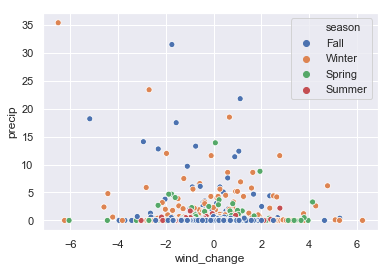

In [13]:
sns.set()
sns.scatterplot(x='wind_change', y='precip',data=new_data, hue='season')

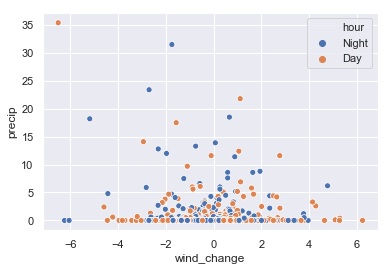

In [14]:
sns.scatterplot(x='wind_change', y='precip',data=new_data, hue='hour')

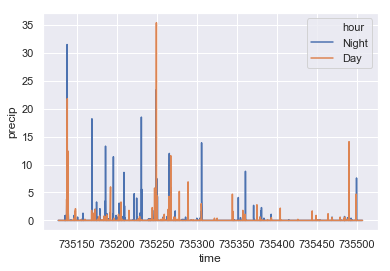

In [19]:
sns.lineplot(x='time',y='precip',data=new_data, hue='hour')

In [31]:
new_data.groupby('hour')[['precip','sss_change','sst','wind_change']].agg(['mean','max','std'])

precip                 sss_change                            sst  \
           mean   max       std       mean       max       std       mean   
hour                                                                        
Day    0.068201  35.4  0.847724  -0.000077  0.426465  0.021734  24.777489   
Night  0.087505  31.5  0.928305   0.000026  0.739762  0.033585  24.793833   

                           wind_change                      
             max       std        mean       max       std  
hour                                                        
Day    29.314786  1.442669    0.001055  6.229702  0.685571  
Night  30.004906  1.448029   -0.001039  4.766340  0.617668

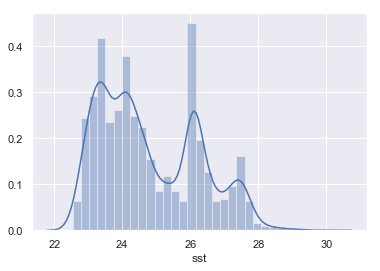

In [26]:
sns.distplot(new_data['sst'])

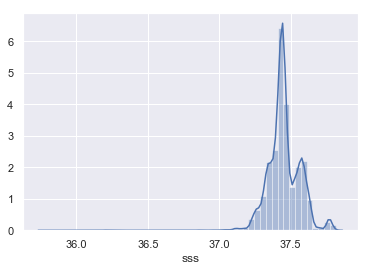

In [27]:
sns.distplot(new_data['sss'])

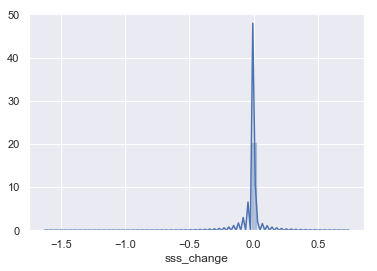

In [28]:
sns.distplot(new_data['sss_change'])

In [29]:
columns = ['season','hour']
new_enc = pd.get_dummies(new_data, columns=columns, drop_first=False)
new_enc.head()

,new_time,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,day,sss_change,wind_change,season_Fall,season_Spring,season_Summer,season_Winter,hour_Day,hour_Night
0,2012-09-14 20:30:00.000028800,735126.854167,37.768217,27.886503,3.171527,-70.402566,0.0,0.0,0.0,2012,9,14,0.000000,0.000000,1,0,0,0,0,1
1,2012-09-14 21:29:59.999971200,735126.895833,37.767291,27.794171,3.511590,-78.652231,0.0,0.0,0.0,2012,9,14,-0.000926,0.340064,1,0,0,0,0,1
2,2012-09-14 22:30:00.000000000,735126.937500,37.767912,27.717789,4.870495,-86.660419,0.0,0.0,0.0,2012,9,14,0.000621,1.358904,1,0,0,0,0,1
3,2012-09-14 23:30:00.000028800,735126.979167,37.768554,27.650786,4.511677,-89.874044,0.0,0.0,0.0,2012,9,14,0.000642,-0.358818,1,0,0,0,0,1
4,2012-09-15 00:29:59.999971200,735127.020833,37.770119,27.593085,4.318494,-94.403915,0.0,0.0,0.0,2012,9,15,0.001566,-0.193182,1,0,0,0,0,1


# Thresholds

In [32]:
rain = new_enc[new_enc['precip'] >0]['precip']
print(rain.median())
rain.mean()

0.5


1.8327319587628867

In [34]:
new_enc[new_enc['precip']>0]['month'].value_counts('all').sort_values()

7     0.007732
4     0.025773
6     0.030928
8     0.041237
3     0.046392
5     0.056701
10    0.085052
2     0.103093
9     0.123711
12    0.126289
11    0.149485
1     0.203608
Name: month, dtype: float64

In [37]:
new_enc[new_enc['precip']>0]['hour_Night'].value_counts('all').sort_values()

0    0.453608
1    0.546392
Name: hour_Night, dtype: float64

In [47]:
new_enc.groupby('year')['month'].value_counts()

year  month
2012  10       744
      12       744
      11       720
      9        388
2013  1        744
      3        744
      5        744
      7        744
      8        744
      4        720
      6        720
      9        705
      2        672
Name: month, dtype: int64

In [42]:
seasons = ['season_Winter','season_Spring','season_Summer','season_Fall']
for i in seasons:
    print(i, new_enc[new_enc['precip']>0][i].value_counts('all'))

season_Winter 0    0.56701
1    0.43299
Name: season_Winter, dtype: float64
season_Spring 0    0.871134
1    0.128866
Name: season_Spring, dtype: float64
season_Summer 0    0.920103
1    0.079897
Name: season_Summer, dtype: float64
season_Fall 0    0.641753
1    0.358247
Name: season_Fall, dtype: float64


In [38]:
new_enc[new_enc['precip']>0]['season_Winter'].value_counts('all').sort_values()

1    0.43299
0    0.56701
Name: season_Winter, dtype: float64

So from the start, pretty weird that for rain values > 0, only 8% of values are in the summer but 43.34% are in the winter? 

In [17]:
data.groupby(['month','year'])['precip'].agg(['mean','max']).sort_values(by='mean', ascending=False)

,,mean,max
month,year,,
9,2012,0.285567,31.5
1,2013,0.252554,35.4
11,2012,0.120000,13.3
12,2012,0.102419,18.5
2,2013,0.095536,11.6
9,2013,0.069362,14.1
10,2012,0.065591,18.2
3,2013,0.041263,13.9
5,2013,0.039516,8.8


In [48]:
ordered_rain = rain.sort_values(ascending=True)
new_sum = np.array(ordered_rain).cumsum()
scaled_sum = new_sum/new_sum.max()
first = len(scaled_sum[scaled_sum >= 0.5])
second = len(scaled_sum[scaled_sum >= 0.25])
#new_sum[-11:]
print(len(ordered_rain))
print(first)
print(second)
print(ordered_rain[-second:(-second +1)])

ordered_rain[-first:(-first +1)]


388
26
70
3328    2.4
Name: precip, dtype: float64


3335    6.2
Name: precip, dtype: float64

In [49]:
low_thres = new_enc[new_enc['precip'] < 3.766850]
thres = new_enc[new_enc['precip'] >= 3.766850]
threshold = [2 if i >= 6.1 else 1 if i >=2.3 else 0 for i in new_enc['precip']]
new_enc['thres'] = threshold
print(low_thres[['sss_change','sss','sst','wind_spd']].agg(['mean','median']))
print(thres[['sss_change','sss','sst','wind_spd']].agg(['mean','median']))

        sss_change        sss        sst  wind_spd
mean      0.000653  37.453298  24.787120  5.669648
median    0.000167  37.443424  24.409049  5.821573
        sss_change        sss        sst  wind_spd
mean     -0.118638  37.290929  24.532075  5.562377
median   -0.047402  37.356062  23.937423  5.816297


In [50]:
new_enc['thres'].unique()

array([0, 1, 2], dtype=int64)

In [51]:
new_enc['temp_change'] = new_enc['sst'].diff().fillna(0)
new_enc['temp_change'].isna().sum()

0

In [52]:
new_enc.columns

Index(['new_time', 'time', 'sss', 'sst', 'wind_spd', 'wind_dir', 'precip',
       'cum_precip3', 'cum_precip6', 'year', 'month', 'day', 'sss_change',
       'wind_change', 'season_Fall', 'season_Spring', 'season_Summer',
       'season_Winter', 'hour_Day', 'hour_Night', 'thres', 'temp_change'],
      dtype='object')

In [53]:
## So group 0 is below the threshold, group 1 is at or above
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
#Would need to merge things 
mc = MultiComparison(new_enc['sss'], new_enc['thres'])
result = mc.tukeyhsd()

mc1 = MultiComparison(new_enc['sss_change'], new_enc['thres'])
result1 = mc1.tukeyhsd()

mc2 = MultiComparison(new_enc['wind_spd'], new_enc['thres'])
result2 = mc2.tukeyhsd()

mc3 = MultiComparison(new_enc['wind_change'], new_enc['thres'])
result3 = mc3.tukeyhsd()

mc4 = MultiComparison(new_enc['sst'], new_enc['thres'])
result4 = mc4.tukeyhsd()

mc5 = MultiComparison(new_enc['wind_dir'], new_enc['thres'])
result5 = mc5.tukeyhsd()

mc6 = MultiComparison(new_enc['temp_change'], new_enc['thres'])
result6 = mc5.tukeyhsd()
 
print(result)
print('For Salinity', mc.groupsunique,'\n\n')

print(result1)
print('For Salinity Change', mc1.groupsunique,'\n\n')

print(result2)
print('For Wind Speed', mc2.groupsunique,'\n\n')

print(result3)
print('For Wind Change',mc3.groupsunique,'\n\n')

print(result4)
print('For Temperature',mc4.groupsunique,'\n\n')

print(result5)
print('For Wind Direction',mc5.groupsunique,'\n\n')

print(result6)
print('For Temperature Change',mc6.groupsunique,'\n\n')

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1    -0.0594  -0.0976 -0.0212  True 
  0      2    -0.2233  -0.2731 -0.1734  True 
  1      2    -0.1639  -0.2265 -0.1012  True 
---------------------------------------------
For Salinity [0 1 2] 


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1    -0.0142  -0.0231 -0.0053  True 
  0      2    -0.2141  -0.2257 -0.2025  True 
  1      2    -0.1999  -0.2145 -0.1852  True 
---------------------------------------------
For Salinity Change [0 1 2] 


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  0      1     0.0599  -0.7125 0.8322 False 
  0      2     0.1609  -0.8462 1.168  False 
  1      2     0.101   -1.1657 1.3678 False 
---------------

In [54]:
def label_ses(row):
    if row['season_Winter'] == 1:
        return 'Winter'
    if row['season_Spring'] == 1 :
        return 'Spring'
    if row['season_Summer'] == 1 :
        return 'Summer'
    if row['season_Fall'] == 1:
        return 'Fall'

In [55]:
new_enc['Seasons'] = new_enc.apply(lambda row: label_ses(row), axis=1)

In [56]:
mc = MultiComparison(new_enc['sss'], new_enc['Seasons'])
result = mc.tukeyhsd()

mc1 = MultiComparison(new_enc['sss_change'], new_enc['Seasons'])
result1 = mc1.tukeyhsd()

mc2 = MultiComparison(new_enc['wind_spd'], new_enc['Seasons'])
result2 = mc2.tukeyhsd()

mc3 = MultiComparison(new_enc['wind_change'], new_enc['Seasons'])
result3 = mc3.tukeyhsd()

mc4 = MultiComparison(new_enc['sst'], new_enc['Seasons'])
result4 = mc4.tukeyhsd()

mc5 = MultiComparison(new_enc['temp_change'], new_enc['Seasons'])
result5 = mc5.tukeyhsd()
 
print(result)
print('For Salinity', mc.groupsunique,'\n\n')

print(result1)
print('For Salinity Change', mc1.groupsunique,'\n\n')

print(result2)
print('For Wind Speed', mc2.groupsunique,'\n\n')

print(result3)
print('For Wind Speed Change',mc3.groupsunique,'\n\n')

print(result4)
print('For Temperature',mc4.groupsunique,'\n\n')

print(result5)
print('For Temperature Change',mc5.groupsunique,'\n\n')

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 Fall  Spring -0.1468  -0.1533 -0.1403  True 
 Fall  Summer  -0.175  -0.1815 -0.1685  True 
 Fall  Winter  -0.103  -0.1095 -0.0964  True 
Spring Summer -0.0282   -0.035 -0.0214  True 
Spring Winter  0.0438   0.037   0.0506  True 
Summer Winter  0.072    0.0652  0.0788  True 
---------------------------------------------
For Salinity ['Fall' 'Spring' 'Summer' 'Winter'] 


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 Fall  Spring -0.0001  -0.0022 0.002  False 
 Fall  Summer -0.0001  -0.0022 0.0021 False 
 Fall  Winter -0.0001  -0.0022 0.002  False 
Spring Summer   0.0    -0.0022 0.0022 False 
Spring Winter   -0.0   -0.0022 0.0022 False 
Summer Winter   -0.0   -0.0022 0.0022 False 
--------------------------------------------
For Salinity Change ['Fall'

In [57]:
new_enc.columns

Index(['new_time', 'time', 'sss', 'sst', 'wind_spd', 'wind_dir', 'precip',
       'cum_precip3', 'cum_precip6', 'year', 'month', 'day', 'sss_change',
       'wind_change', 'season_Fall', 'season_Spring', 'season_Summer',
       'season_Winter', 'hour_Day', 'hour_Night', 'thres', 'temp_change',
       'Seasons'],
      dtype='object')

In [51]:
new_enc.to_csv('new_enc.csv')

In [58]:
new_enc[new_enc['season_Spring'] ==1]['month'].unique()

array([3, 4, 5], dtype=int64)

In [62]:
new_enc.groupby(['year','thres'])['Seasons'].value_counts()

year  thres  Seasons
2012  0      Fall       1832
             Winter      734
      1      Fall         11
             Winter        7
      2      Fall          9
             Winter        3
2013  0      Summer     2208
             Spring     2196
             Winter     1390
             Fall        700
      1      Winter       17
             Spring       10
             Fall          1
      2      Winter        9
             Fall          4
             Spring        2
Name: Seasons, dtype: int64

In [60]:
new_enc[new_enc['Seasons']=='Fall']['month'].unique()

array([ 9, 10, 11], dtype=int64)

In [121]:
print(new_enc[new_enc['season_Winter'] ==1].groupby('season_Winter')['thres'].value_counts())
print(new_enc[new_enc['season_Spring'] ==1].groupby('season_Spring')['thres'].value_counts())
print(new_enc[new_enc['season_Summer'] ==1].groupby('season_Summer')['thres'].value_counts())
new_enc[new_enc['season_Fall'] ==1].groupby('season_Fall')['thres'].value_counts()

season_Winter  thres
1              0        2124
               1          24
               2          12
Name: thres, dtype: int64
season_Spring  thres
1              0        2196
               1          10
               2           2
Name: thres, dtype: int64
season_Summer  thres
1              0        2208
Name: thres, dtype: int64


season_Fall  thres
1            0        2532
             2          13
             1          12
Name: thres, dtype: int64

So using multiple groups (group 0 as everything below a 33% rainfall value threshold, group 1 as the 33%-50%, and group 2 as the 50% and above values) we can see that there are significant differences in mean values for several fields and several thresholds

In [122]:
print(new_enc[new_enc['hour_Day'] ==1].groupby('hour_Day')['thres'].value_counts())
print(new_enc[new_enc['hour_Night'] ==1].groupby('hour_Night')['thres'].value_counts())

hour_Day  thres
1         0        4530
          1          23
          2          10
Name: thres, dtype: int64
hour_Night  thres
1           0        4530
            1          23
            2          17
Name: thres, dtype: int64


In [123]:
new_enc[new_enc['thres'] == 0][['sss','sst','wind_change','sss_change']].median()

sss            37.443455
sst            24.411147
wind_change    -0.015505
sss_change      0.000169
dtype: float64

In [124]:
new_enc[new_enc['thres'] == 1][['sss','sst','wind_change','sss_change']].median()

sss            37.409028
sst            23.778191
wind_change     0.136382
sss_change     -0.016208
dtype: float64

In [125]:
new_enc[new_enc['thres'] == 2][['sss','sst','wind_change','sss_change']].median()

sss            37.334057
sst            24.397416
wind_change    -0.560226
sss_change     -0.099072
dtype: float64

In [126]:
new_enc[new_enc['thres'] == 3][['sss','sst','wind_change','sss_change']].median()

sss           NaN
sst           NaN
wind_change   NaN
sss_change    NaN
dtype: float64

In [127]:
new_enc[new_enc['hour_Day'] == 1][['sss','sst','wind_change','sss_change']].median()

sss            37.442440
sst            24.400775
wind_change    -0.016955
sss_change      0.000232
dtype: float64

In [128]:
new_enc[new_enc['hour_Day'] == 0][['sss','sst','wind_change','sss_change']].median()

sss            37.443875
sst            24.410080
wind_change    -0.012461
sss_change      0.000078
dtype: float64

# Models

In [40]:
new_enc.columns

Index(['new_time', 'time', 'sss', 'sst', 'wind_spd', 'wind_dir', 'precip',
       'cum_precip3', 'cum_precip6', 'year', 'month', 'day', 'sss_change',
       'wind_change', 'season_Fall', 'season_Spring', 'season_Summer',
       'season_Winter', 'hour_Day', 'hour_Night', 'thres', 'temp_change',
       'Seasons'],
      dtype='object')

In [64]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler
X = new_enc.drop(['cum_precip3','cum_precip6','thres','time','new_time',
                 'wind_dir','precip','Seasons'],axis=1)
y=new_enc['thres']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [85]:
import warnings 
warnings.filterwarnings('ignore')
log = LogisticRegression()
rb = RobustScaler()
steps = [('scaler',rb), ('log', log)]
pipe = Pipeline(steps)
parameters = {'log__C': [1, 10, 50, 100], 'log__multi_class': ['multinomial','auto'],
               'log__solver': ['lbfgs','sag','saga','newton-cg'], 'log__max_iter': [100, 200,500],}

grid = GridSearchCV(pipe, param_grid=parameters, cv=5)

grid.fit(X_train, y_train)
print("score = %3.4f" %(grid.score(X_test,y_test)))
print(grid.best_params_)

from sklearn.metrics import confusion_matrix
pred = grid.best_estimator_.predict(X_test)
print(confusion_matrix(y_test, pred))

score = 0.9934
{'log__C': 1, 'log__max_iter': 100, 'log__multi_class': 'multinomial', 'log__solver': 'sag'}
[[2720    0    0]
 [  12    0    0]
 [   6    0    2]]


In [43]:
steps1 = [('scaler', RobustScaler()), ('forest',  RandomForestClassifier(random_state=42))] 

pipeline1 = Pipeline(steps1)

parameters1 = {'forest__n_estimators':[200,500,1000], 'forest__min_samples_split':[2,3,4],
               'forest__criterion':['gini','entropy'],'forest__max_depth':[2,3,4,None]} 
    
grid1 = GridSearchCV(pipeline1, param_grid=parameters1, cv=5, scoring='accuracy')

grid1.fit(X_train, y_train)
print("score = %3.4f" %(grid1.score(X_test,y_test)))
print(grid1.best_params_)
pred1 = grid1.best_estimator_.predict(X_test)
print(confusion_matrix(y_test, pred1))

KeyboardInterrupt: 

In [105]:
pred2 = grid1.best_estimator_.predict(X_train)
print(confusion_matrix(y_train, pred2))

[[5643    0    0    0]
 [   0  243    0    0]
 [   0    0   31    0]
 [   0    0    0   19]]


In [185]:
new_enc['thres'].value_counts()

0    8690
1     391
3      26
2      26
Name: thres, dtype: int64

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

steps1 = [('scaler', RobustScaler()), ('forest',  XGBClassifier(random_state=42, tree_method='hist',))] 

pipeline1 = Pipeline(steps1)

parameters1 = {'forest__n_estimators':[200,500,1000], 'forest__min_samples_split':[2,3,4],
               'forest__booster':['gbtree','dart'],'forest__grow_policy':['lossguide','depthwise'],
              'forest__max_bin':[128,256]} 
    
grid1 = GridSearchCV(pipeline1, param_grid=parameters1, cv=5)

grid1.fit(X_train, y_train)
print("score = %3.4f" %(grid1.score(X_test,y_test)))
print(grid1.best_params_)
pred1 = grid1.best_estimator_.predict(X_test)
print(confusion_matrix(y_test, pred1))

[14:56:55] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[14:56:57] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[14:56:59] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[14:57:01] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[14:57:03] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[14:57:05] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[14:57:11] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[14:57:17] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[14:57:22] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[14:57:27] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[14:57:32] Tree meth

[15:05:20] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[15:05:26] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[15:05:36] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[15:05:47] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[15:05:57] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[15:06:07] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[15:06:17] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[15:06:19] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[15:06:22] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[15:06:24] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[15:06:26] Tree meth

[08:47:38] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[08:47:39] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[08:47:40] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[08:47:44] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[08:47:48] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[08:47:51] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[08:47:55] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[08:47:58] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[08:48:06] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[08:48:16] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[08:48:29] Tree meth

[11:20:31] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:12:39] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:17:56] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:22:53] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:23:04] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:23:14] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:23:24] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:23:34] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:23:45] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:25:01] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[12:26:18] Tree meth

[14:50:48] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[14:51:43] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[14:52:37] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[14:53:33] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[14:54:28] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[14:57:56] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[15:01:24] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[15:04:52] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[15:08:24] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[15:11:55] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[15:12:02] Tree meth

In [186]:
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method='hist',booster='gbtree',n_estimators=1000, grow_policy='lossguide')

# steps1 = [('scaler', RobustScaler()), ('forest',  XGBClassifier(random_state=42, tree_method='hist',))] 

# pipeline1 = Pipeline(steps1)

# parameters1 = {'forest__n_estimators':[200,500,1000], 'forest__min_samples_split':[2,3,4],
#                'forest__criterion':['gini','entropy'],'forest__max_depth':[2,3,4]} 
    
#grid1 = GridSearchCV(pipeline1, param_grid=parameters1, cv=5)

xgb.fit(X_train, y_train)
print("score = %3.5f" %(xgb.score(X_test,y_test)))
pred1 = xgb.predict(X_test)
print(confusion_matrix(y_test, pred1))
print(classification_report(y_test, pred1))

[08:36:29] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
score = 0.94870
[[3016   29    1    1]
 [ 117   15    2    1]
 [   4    3    0    1]
 [   1    2    2    2]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      3047
           1       0.31      0.11      0.16       135
           2       0.00      0.00      0.00         8
           3       0.40      0.29      0.33         7

   micro avg       0.95      0.95      0.95      3197
   macro avg       0.42      0.35      0.37      3197
weighted avg       0.93      0.95      0.94      3197



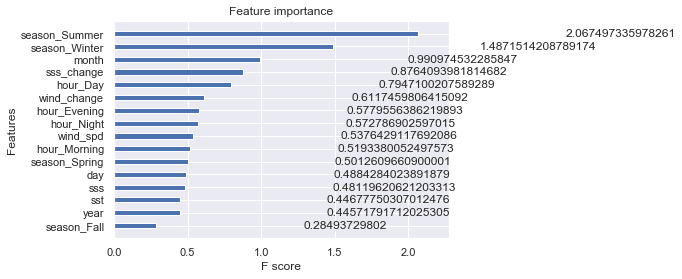

In [187]:
import xgboost
xgboost.plot_importance(xgb, importance_type='gain', height=0.4)

In [65]:
from sklearn.decomposition import PCA
pca = PCA(.97)
pca.fit(X)
csum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(csum>=.97)+1
d

3

In [66]:
first_set = X.sample(frac=.5, random_state=42)
second_set = X.sample(frac=.5, random_state=0)
third_set = X.sample(frac=.5, random_state=13)
first_y = y.sample(frac=.5, random_state=42)
second_y = y.sample(frac=.5, random_state=0)
third_y = y.sample(frac=.5, random_state=13)

In [84]:
import warnings
warnings.filterwarnings('ignore')
for n in range(1,20):
    X_set = X.sample(frac=0.5, random_state=n)
    y_set = y.sample(frac=0.5, random_state=n)
    
    rfe = RFE(model, 7)
    rfe = rfe.fit(X_set, y_set)

    #print(rfe.support_)
    print(rfe.ranking_)
print(X.columns)

[1 1 1 5 2 1 1 1 8 6 9 7 4 3 1]
[1 1 1 6 2 1 1 1 7 9 8 3 5 4 1]
[1 1 1 8 2 1 1 1 5 7 9 3 6 4 1]
[1 1 1 6 1 2 1 1 7 8 9 5 4 3 1]
[1 1 1 4 1 2 1 1 6 7 9 8 3 5 1]
[1 1 1 8 2 1 1 1 5 7 9 6 4 3 1]
[1 1 1 7 2 1 1 1 6 8 9 4 5 3 1]
[1 1 1 6 1 2 1 1 7 8 9 3 4 5 1]
[1 1 1 7 2 1 1 1 8 5 9 3 6 4 1]
[1 1 1 6 1 2 1 1 7 8 9 3 4 5 1]
[1 1 1 7 2 1 1 1 6 8 9 4 5 3 1]
[1 1 1 6 1 2 1 1 7 5 9 3 4 8 1]
[1 1 1 8 2 1 1 1 7 6 9 3 4 5 1]
[1 1 1 6 1 2 1 1 4 8 9 3 7 5 1]
[1 1 1 8 2 1 1 1 3 7 9 5 4 6 1]
[1 1 1 4 2 1 1 1 6 8 9 7 3 5 1]
[1 1 1 7 2 1 1 1 5 8 9 3 6 4 1]
[1 1 1 5 1 2 1 1 8 7 9 6 3 4 1]
[1 1 1 8 2 1 1 1 6 7 9 4 3 5 1]
Index(['sss', 'sst', 'wind_spd', 'year', 'month', 'day', 'sss_change',
       'wind_change', 'season_Fall', 'season_Spring', 'season_Summer',
       'season_Winter', 'hour_Day', 'hour_Night', 'temp_change'],
      dtype='object')


In [77]:
from sklearn.feature_selection import RFE

model = RandomForestClassifier()

rfe = RFE(model, 7)
rfe = rfe.fit(first_set, first_y)

print(rfe.support_)
print(rfe.ranking_)
print(X.head(0))

C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\new\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 

[ True  True  True False False  True  True  True False False False False
 False False  True]
[1 1 1 6 2 1 1 1 7 9 8 3 5 4 1]
Empty DataFrame
Columns: [sss, sst, wind_spd, year, month, day, sss_change, wind_change, season_Fall, season_Spring, season_Summer, season_Winter, hour_Day, hour_Night, temp_change]
Index: []


In [48]:
rfe = RFE(xgb, 7)
rfe = rfe.fit(second_set, second_y)

print(rfe.support_)
print(rfe.ranking_)
print(X.head(0))

[ True  True  True False  True False  True  True False False False False
 False False  True]
[1 1 1 6 1 2 1 1 9 5 7 4 3 8 1]
Empty DataFrame
Columns: [sss, sst, wind_spd, year, month, day, sss_change, wind_change, season_Fall, season_Spring, season_Summer, season_Winter, hour_Day, hour_Night, temp_change]
Index: []


In [49]:
rfe = RFE(xgb, 7)
rfe = rfe.fit(third_set, third_y)

print(rfe.support_)
print(rfe.ranking_)
print(X.head(0))

[ True  True  True False False  True  True  True False False False False
 False False  True]
[1 1 1 8 3 1 1 1 7 6 5 2 4 9 1]
Empty DataFrame
Columns: [sss, sst, wind_spd, year, month, day, sss_change, wind_change, season_Fall, season_Spring, season_Summer, season_Winter, hour_Day, hour_Night, temp_change]
Index: []


In [190]:
X1 = X.drop(['year','season_Fall','season_Spring','season_Summer','season_Winter',
           'hour_Day','hour_Evening','hour_Morning','hour_Night'],axis=1)
X1.head()

,sss,sst,wind_spd,month,day,sss_change,wind_change
0,37.768217,27.886503,3.171527,9,14,0.000000,0.000000
1,37.767291,27.794171,3.511590,9,14,-0.000926,0.340064
2,37.767912,27.717789,4.870495,9,14,0.000621,1.358904
3,37.768554,27.650786,4.511677,9,14,0.000642,-0.358818
4,37.770119,27.593085,4.318494,9,15,0.001566,-0.193182


In [193]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500).fit(X_train, y_train)

perm = PermutationImportance(rf, random_state=42).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0016 ± 0.0013,sss_change
-0.0000 ± 0.0006,hour_Night
-0.0000 ± 0.0008,season_Winter
-0.0001 ± 0.0008,month
-0.0002 ± 0.0006,hour_Morning
-0.0003 ± 0.0005,season_Fall
-0.0003 ± 0.0000,hour_Evening
-0.0003 ± 0.0008,season_Summer
-0.0003 ± 0.0006,season_Spring
-0.0004 ± 0.0006,sss


In [199]:
X_weird = X[['sss_change','hour_Night']]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_weird, y, test_size=0.3, random_state=42)
xgb.fit(X_train1, y_train1)
print("score = %3.5f" %(xgb.score(X_test1,y_test1)))
pred1 = xgb.predict(X_test1)
print(confusion_matrix(y_test1, pred1))
print(classification_report(y_test1, pred1))

[08:56:46] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
score = 0.95511
[[2613    0    0    1]
 [ 114    0    0    0]
 [   5    0    0    0]
 [   3    0    0    4]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2614
           1       0.00      0.00      0.00       114
           2       0.00      0.00      0.00         5
           3       0.80      0.57      0.67         7

   micro avg       0.96      0.96      0.96      2740
   macro avg       0.44      0.39      0.41      2740
weighted avg       0.91      0.96      0.93      2740



In [75]:
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    "num_class" : 4,
    'objective': 'multiclass',
    'metric': {'multi_error', 'multi_logloss'},
    'num_leaves': 34,
    'learning_rate': 0.15,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=lgb_eval,
                early_stopping_rounds=50)


print('Starting predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# eval
#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test,y_pred))

Starting training...
[1]	valid_0's multi_logloss: 0.0562857	valid_0's multi_error: 0.0116788
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's multi_logloss: 0.0495602	valid_0's multi_error: 0.0120438
[3]	valid_0's multi_logloss: 0.0466876	valid_0's multi_error: 0.0116788
[4]	valid_0's multi_logloss: 0.0439902	valid_0's multi_error: 0.0116788
[5]	valid_0's multi_logloss: 0.0419774	valid_0's multi_error: 0.0120438
[6]	valid_0's multi_logloss: 0.0401502	valid_0's multi_error: 0.0120438
[7]	valid_0's multi_logloss: 0.0392931	valid_0's multi_error: 0.0109489
[8]	valid_0's multi_logloss: 0.0382702	valid_0's multi_error: 0.00948905
[9]	valid_0's multi_logloss: 0.0372864	valid_0's multi_error: 0.00875912
[10]	valid_0's multi_logloss: 0.0365033	valid_0's multi_error: 0.00839416
[11]	valid_0's multi_logloss: 0.0353507	valid_0's multi_error: 0.00875912
[12]	valid_0's multi_logloss: 0.0343247	valid_0's multi_error: 0.00912409
[13]	valid_0's multi_logloss: 0.033857	valid_

In [76]:
print(confusion_matrix(y_test, y_pred.argmax(axis=1)))

[[2714    3    3]
 [   9    3    0]
 [   2    3    3]]


# Oversampling (again)

In [87]:
from sklearn.preprocessing import RobustScaler
rb = RobustScaler()
from imblearn.over_sampling import SMOTE
sm = SMOTE(ratio='minority', random_state=7, k_neighbors=15)

In [89]:
X.columns

Index(['sss', 'sst', 'wind_spd', 'year', 'month', 'day', 'sss_change',
       'wind_change', 'season_Fall', 'season_Spring', 'season_Summer',
       'season_Winter', 'hour_Day', 'hour_Night', 'temp_change'],
      dtype='object')

In [92]:
oversampled_trainX, oversampled_trainY = sm.fit_sample(X_train, y_train)
oversampled_trainX, oversampled_trainY = sm.fit_sample(oversampled_trainX, oversampled_trainY)
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
#oversampled_train.columns = normalized_df.columns
oversampled_train.columns = ['thres','sss','sst','wind_spd','year','month','day','sss_change','wind_change','season_Fall',
                             'season_Spring','season_Summer','season_Winter','hour_Day','hour_Night','temp_change']
oversampled_train

,thres,sss,sst,wind_spd,year,month,day,sss_change,wind_change,season_Fall,season_Spring,season_Summer,season_Winter,hour_Day,hour_Night,temp_change
0,0,37.334225,24.614131,2.095882,2013.000000,6.000000,26.000000,-0.016398,0.298860,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,-0.132218
1,0,37.428630,23.011301,4.467956,2013.000000,3.000000,2.000000,-0.000705,0.555271,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,-0.004929
2,0,37.424122,23.540934,7.049370,2013.000000,1.000000,20.000000,-0.002150,-0.376755,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.007808
3,0,37.569999,24.597382,7.478987,2012.000000,12.000000,4.000000,0.000816,0.189039,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.005493
4,0,37.412158,23.447521,8.217731,2013.000000,1.000000,25.000000,0.001396,1.713152,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,-0.011494
5,0,37.482667,25.542588,2.936291,2013.000000,7.000000,23.000000,0.000088,-0.152443,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-0.014558
6,0,37.581765,24.707506,8.789524,2012.000000,11.000000,21.000000,0.000065,0.095466,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,-0.003313
7,0,37.607810,26.220642,5.677573,2012.000000,11.000000,3.000000,0.007626,-0.479722,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,-0.007052
8,0,37.629604,25.417926,9.477451,2012.000000,11.000000,11.000000,-0.000221,-0.511346,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,-0.003220
9,0,37.308972,26.107345,5.489002,2013.000000,9.000000,1.000000,0.002676,0.150812,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.007064


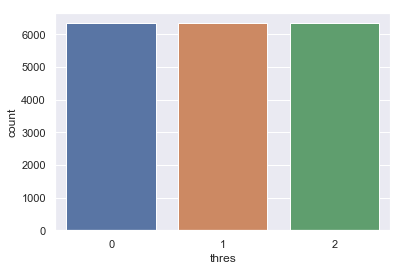

In [93]:
sns.countplot(x='thres', data=oversampled_train)

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
new_X = oversampled_train.drop('thres',axis=1)
new_y = oversampled_train['thres']
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.3, random_state=42)

steps1 = [('scaler', RobustScaler()), ('forest',  XGBClassifier(random_state=42, tree_method='hist',))] 

pipeline1 = Pipeline(steps1)

parameters1 = {'forest__n_estimators':[200,500,1000], 'forest__min_samples_split':[2,3,4],
               'forest__booster':['gbtree','dart'],'forest__grow_policy':['lossguide','depthwise'],
              'forest__max_bin':[128,256]} 
    
grid1 = GridSearchCV(pipeline1, param_grid=parameters1, cv=5)

grid1.fit(new_X_train, new_y_train)
print("score = %3.4f" %(grid1.score(new_X_test,new_y_test)))
print(grid1.best_params_)
pred1 = grid1.best_estimator_.predict(new_X_test)
print(confusion_matrix(new_y_test, pred1))

[13:16:05] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[13:16:11] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[13:16:16] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[13:16:21] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[13:16:26] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[13:16:31] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[13:16:42] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[13:16:52] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[13:17:05] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[13:17:17] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[13:17:30] Tree meth

[13:35:52] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[13:36:08] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[13:36:40] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[13:37:10] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[13:37:42] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[13:38:13] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[13:38:45] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[13:38:51] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[13:38:57] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[13:39:03] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[13:39:09] Tree meth

[13:57:24] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[13:57:29] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[13:57:34] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[13:57:46] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[13:58:00] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[13:58:16] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[13:58:31] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[13:58:47] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[13:59:18] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[13:59:45] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[14:00:15] Tree meth

[19:29:03] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[19:43:16] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[19:56:40] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[20:10:06] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[20:10:36] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[20:11:07] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[20:11:37] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[20:12:07] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[20:12:38] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[20:15:58] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[20:19:23] Tree meth